In [1]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Loan-Approval-Prediction (2).csv to Loan-Approval-Prediction (2).csv


In [3]:
import io
data=pd.read_csv(io.StringIO(uploaded['Loan-Approval-Prediction (2).csv'].decode('utf-8')))
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
data.drop(columns=["Loan_ID"], inplace=True)

In [7]:
data["Credit_History"]=data["Credit_History"].fillna(round(data["Credit_History"].mean(),1))
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])

In [8]:
data["Dependents"]=data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["LoanAmount"]=data["LoanAmount"].fillna(round(data["LoanAmount"].mean(),1))

In [9]:
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(round(data["Loan_Amount_Term"].mean(),1))
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [10]:
data.head

<bound method NDFrame.head of      Gender Married Dependents  ... Credit_History Property_Area  Loan_Status
0      Male      No          0  ...            1.0         Urban            Y
1      Male     Yes          1  ...            1.0         Rural            N
2      Male     Yes          0  ...            1.0         Urban            Y
3      Male     Yes          0  ...            1.0         Urban            Y
4      Male      No          0  ...            1.0         Urban            Y
..      ...     ...        ...  ...            ...           ...          ...
609  Female      No          0  ...            1.0         Rural            Y
610    Male     Yes         3+  ...            1.0         Rural            Y
611    Male     Yes          1  ...            1.0         Urban            Y
612    Male     Yes          2  ...            1.0         Urban            Y
613  Female      No          0  ...            0.0     Semiurban            N

[614 rows x 12 columns]>

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()

In [13]:
data.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [16]:
for c in col:
    data[c] = encoder.fit_transform(data[c])

In [17]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.4,9,2,2,1
1,1,1,1,0,0,4583,1508.0,128.0,9,2,0,0
2,1,1,0,0,1,3000,0.0,66.0,9,2,2,1
3,1,1,0,1,0,2583,2358.0,120.0,9,2,2,1
4,1,0,0,0,0,6000,0.0,141.0,9,2,2,1


In [18]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 57.7 KB


In [22]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [23]:
x

array([[1., 0., 0., ..., 9., 2., 2.],
       [1., 1., 1., ..., 9., 2., 0.],
       [1., 1., 0., ..., 9., 2., 2.],
       ...,
       [1., 1., 1., ..., 9., 2., 2.],
       [1., 1., 2., ..., 9., 2., 2.],
       [0., 0., 0., ..., 9., 0., 1.]])

In [24]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
x_scaled=scale.fit_transform(x)

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.3, random_state=345)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
xtrain.shape

(429, 11)

In [30]:
xtest.shape

(185, 11)

In [32]:
model=Sequential()
model.add(Dense(25,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [33]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [34]:
model.fit(xtrain, ytrain, epochs = 40, batch_size = 2, validation_data = (xtest, ytest))

Epoch 1/40
215/215 [==============================] - 3s 6ms/step - loss: 0.5942 - val_loss: 0.5952
Epoch 2/40
215/215 [==============================] - 1s 3ms/step - loss: 0.5741 - val_loss: 0.5774
Epoch 3/40
215/215 [==============================] - 0s 2ms/step - loss: 0.5532 - val_loss: 0.5536
Epoch 4/40
215/215 [==============================] - 1s 3ms/step - loss: 0.5283 - val_loss: 0.5302
Epoch 5/40
215/215 [==============================] - 1s 3ms/step - loss: 0.5046 - val_loss: 0.5203
Epoch 6/40
215/215 [==============================] - 1s 3ms/step - loss: 0.4873 - val_loss: 0.5156
Epoch 7/40
215/215 [==============================] - 1s 2ms/step - loss: 0.4746 - val_loss: 0.5163
Epoch 8/40
215/215 [==============================] - 1s 3ms/step - loss: 0.4734 - val_loss: 0.5177
Epoch 9/40
215/215 [==============================] - 1s 3ms/step - loss: 0.4685 - val_loss: 0.5169
Epoch 10/40
215/215 [==============================] - 1s 3ms/step - loss: 0.4606 - val_loss: 0.5216

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                300       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.history.history

{'loss': [0.5942497253417969,
  0.5740899443626404,
  0.5531784296035767,
  0.5283458232879639,
  0.5046446919441223,
  0.4872649312019348,
  0.47455325722694397,
  0.473366379737854,
  0.46849220991134644,
  0.4606073796749115,
  0.4576381742954254,
  0.462909072637558,
  0.4567252993583679,
  0.455946147441864,
  0.4544585049152374,
  0.4488810896873474,
  0.4498687982559204,
  0.449198842048645,
  0.44331592321395874,
  0.4403938055038452,
  0.4431697130203247,
  0.43948203325271606,
  0.4392872452735901,
  0.4361518323421478,
  0.4351203739643097,
  0.43239086866378784,
  0.43076521158218384,
  0.42654702067375183,
  0.4284706711769104,
  0.42908740043640137,
  0.42252829670906067,
  0.4223039448261261,
  0.42017418146133423,
  0.4230874478816986,
  0.4172064960002899,
  0.4184263050556183,
  0.41292092204093933,
  0.41260719299316406,
  0.41333699226379395,
  0.41071346402168274],
 'val_loss': [0.5951968431472778,
  0.577395498752594,
  0.5536032319068909,
  0.5301750898361206,
  

In [37]:
val_loss=pd.DataFrame(model.history.history)

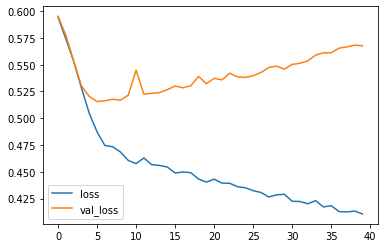

In [38]:
val_loss.plot()

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
stop=EarlyStopping(patience=4)

In [41]:
model2=Sequential()
model2.add(Dense(30,activation="relu"))
model2.add(Dense(10,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))
model2.compile(optimizer="adam",loss="binary_crossentropy")
model2.fit(xtrain,ytrain,epochs=50,batch_size=1,validation_data=(xtest,ytest),callbacks=[stop])

Epoch 1/50
429/429 [==============================] - 2s 3ms/step - loss: 0.5788 - val_loss: 0.5561
Epoch 2/50
429/429 [==============================] - 1s 3ms/step - loss: 0.5158 - val_loss: 0.5259
Epoch 3/50
429/429 [==============================] - 1s 3ms/step - loss: 0.4877 - val_loss: 0.5133
Epoch 4/50
429/429 [==============================] - 1s 3ms/step - loss: 0.4785 - val_loss: 0.5232
Epoch 5/50
429/429 [==============================] - 1s 1ms/step - loss: 0.4707 - val_loss: 0.5250
Epoch 6/50
429/429 [==============================] - 1s 1ms/step - loss: 0.4683 - val_loss: 0.5196
Epoch 7/50
429/429 [==============================] - 1s 1ms/step - loss: 0.4555 - val_loss: 0.5231


In [42]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (1, 30)                   360       
                                                                 
 dense_4 (Dense)             (1, 10)                   310       
                                                                 
 dense_5 (Dense)             (1, 1)                    11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [43]:
model2.history.history

{'loss': [0.5787751078605652,
  0.5158473253250122,
  0.48772069811820984,
  0.4785301089286804,
  0.4706918001174927,
  0.4683230519294739,
  0.4554910957813263],
 'val_loss': [0.5561042428016663,
  0.5258520841598511,
  0.513268232345581,
  0.5231745839118958,
  0.5249921083450317,
  0.5195788145065308,
  0.5231470465660095]}

In [44]:
stop_loss=pd.DataFrame(model2.history.history)

In [45]:
stop_loss

,loss,val_loss
0,0.578775,0.556104
1,0.515847,0.525852
2,0.487721,0.513268
3,0.478530,0.523175
4,0.470692,0.524992
5,0.468323,0.519579
6,0.455491,0.523147


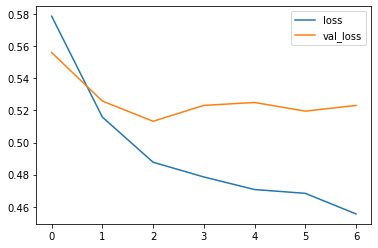

In [46]:
stop_loss.plot()

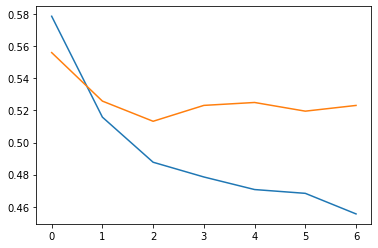

In [47]:
plt.plot(stop_loss)

In [57]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
#ypred1=model.predict_classes(xtest)
#ypred2=model2.predict_classes(xtest)
#predict_x=model.predict(X_test) 
#classes_x=np.argmax(predict_x,axis=1)
ypred=model.predict(xtest)
ypred1=np.round(ypred).astype(int)

In [61]:
ypred22=model2.predict(xtest)
ypred2=np.round(ypred22).astype(int)

In [62]:
accuracy_score(ytest,ypred1)

0.7783783783783784

In [63]:
accuracy_score(ytest,ypred2)

0.7783783783783784

In [64]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.75      0.46      0.57        59
           1       0.79      0.93      0.85       126

    accuracy                           0.78       185
   macro avg       0.77      0.69      0.71       185
weighted avg       0.77      0.78      0.76       185



In [65]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.75      0.46      0.57        59
           1       0.79      0.93      0.85       126

    accuracy                           0.78       185
   macro avg       0.77      0.69      0.71       185
weighted avg       0.77      0.78      0.76       185

